In [1]:
from dyn_net.networks import get_network
import networkx as nx
from scipy.sparse.linalg import eigsh

In [4]:
# ER
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    ER_params = {
        'n' : N,
        'p' : 0.5
    }
    build, p = get_network("erdos_renyi",ER_params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


KeyboardInterrupt: 

In [ ]:
# WS
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    WS_params = {
        'n' : N,
        'k' : N/2
    }
    build, p = get_network("watts_strogatz",WS_params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# Power Law
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    power_law_params = {
        'n' : N,
        'alpha' : 0.3,
        'beta' : 0.4
    }
    build, p = get_network("power_law",power_law_params)
    A = build(p)
    vals, vecs = eigsh(A/N/N**(-power_law_params["beta"]), k=1, which="LA")  
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
# Bistable graphon
N_list = [1000, 2000, 4000, 8000]
records = []
for N in N_list:
    params = {"n": N, "seed": 0}
    build, p = get_network("bistable_graphon", params)
    A = build(p)
    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


### Configuration model networks

1. Poisson

In [ ]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "poisson",
    'params' : {
        'lambda' : 500
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


In [ ]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "scale_free_cutoff",
    'params' : {
        'alpha' : 2.5,
        'k_min' : 1,
        'k_max' : 100
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A.astype(float), k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


N, avg_deg, density, eigenvalue
500 1.702 0.003404 5.8889220533344435
1000 1.655 0.001655 10.370583248824454
2000 1.784 0.000892 6.965815259400966
4000 1.749 0.00043725 10.257937902099494
8000 1.785375 0.000223171875 9.85657854295876


In [ ]:
network_name = "configuration_model"

degree_distribution = {
    'name' : "scale_free_exp_cutoff",
    'params' : {
        'alpha' : 2.5,
        'xi' : 20.0,
        'k_min' : 1,
        'k_max' : 100
    }
} 

N_list = [500, 1000, 2000, 4000, 8000]
records = []
for N in N_list:
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)

    vals, vecs = eigsh(A/N, k=1, which="LA") 
    avg_deg = A.nnz / N
    density = A.nnz / (N * N)
    records.append((N, avg_deg, density, vals[0]))

print("N, avg_deg, density, eigenvalue")
for N, avg_deg, density, eig in records:
    print(N, avg_deg, density, eig)


N, avg_deg, density, eigenvalue
500 1.504 0.003008 0.00930374592488847
1000 1.524 0.001524 0.005625539629617211
2000 1.651 0.0008255 0.003600084677900487
4000 1.51925 0.0003798125 0.0019002354827313004
8000 1.515125 0.000189390625 0.0008528439071872901


### Configuration Model

0.012
494


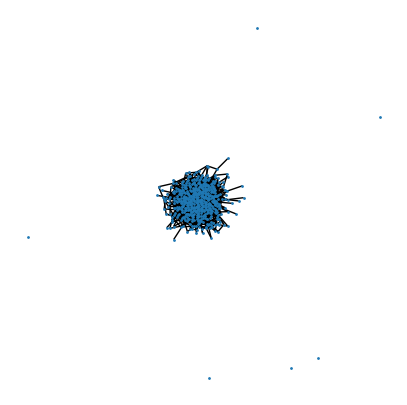

In [ ]:
# Configuration model with Poisson degree distribution
import numpy as np
import networkx as nx
from dyn_net.networks.configuration_model import ConfigurationModelParams, DegreeDistributionSpec, build
from matplotlib import pyplot as plt

network_name = "configuration_model"
size = 500
degree_distribution = {
    'name' : "poisson",
    'params' : {
        'lambda' : 5
    }
} 

network_params = {
    'n' : size,
    'degree_distribution': degree_distribution
}


build_net, p_net = get_network(network_name, network_params)

A = build(p_net)
G = nx.from_scipy_sparse_array(A)

pos = nx.spring_layout(G, seed=1)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=pos, node_size=1, with_labels=False)
plt.axis("off")
isolates = [n for n, d in G.degree() if d == 0]
print( len(isolates) / size )
components = list(nx.connected_components(G))
giant_size = max(len(c) for c in components)
print(giant_size)



/var/folders/j5/hy5phgb90hqgjlb_4jcdzm9w0000gp/T/ipykernel_2958/702782461.py:188: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


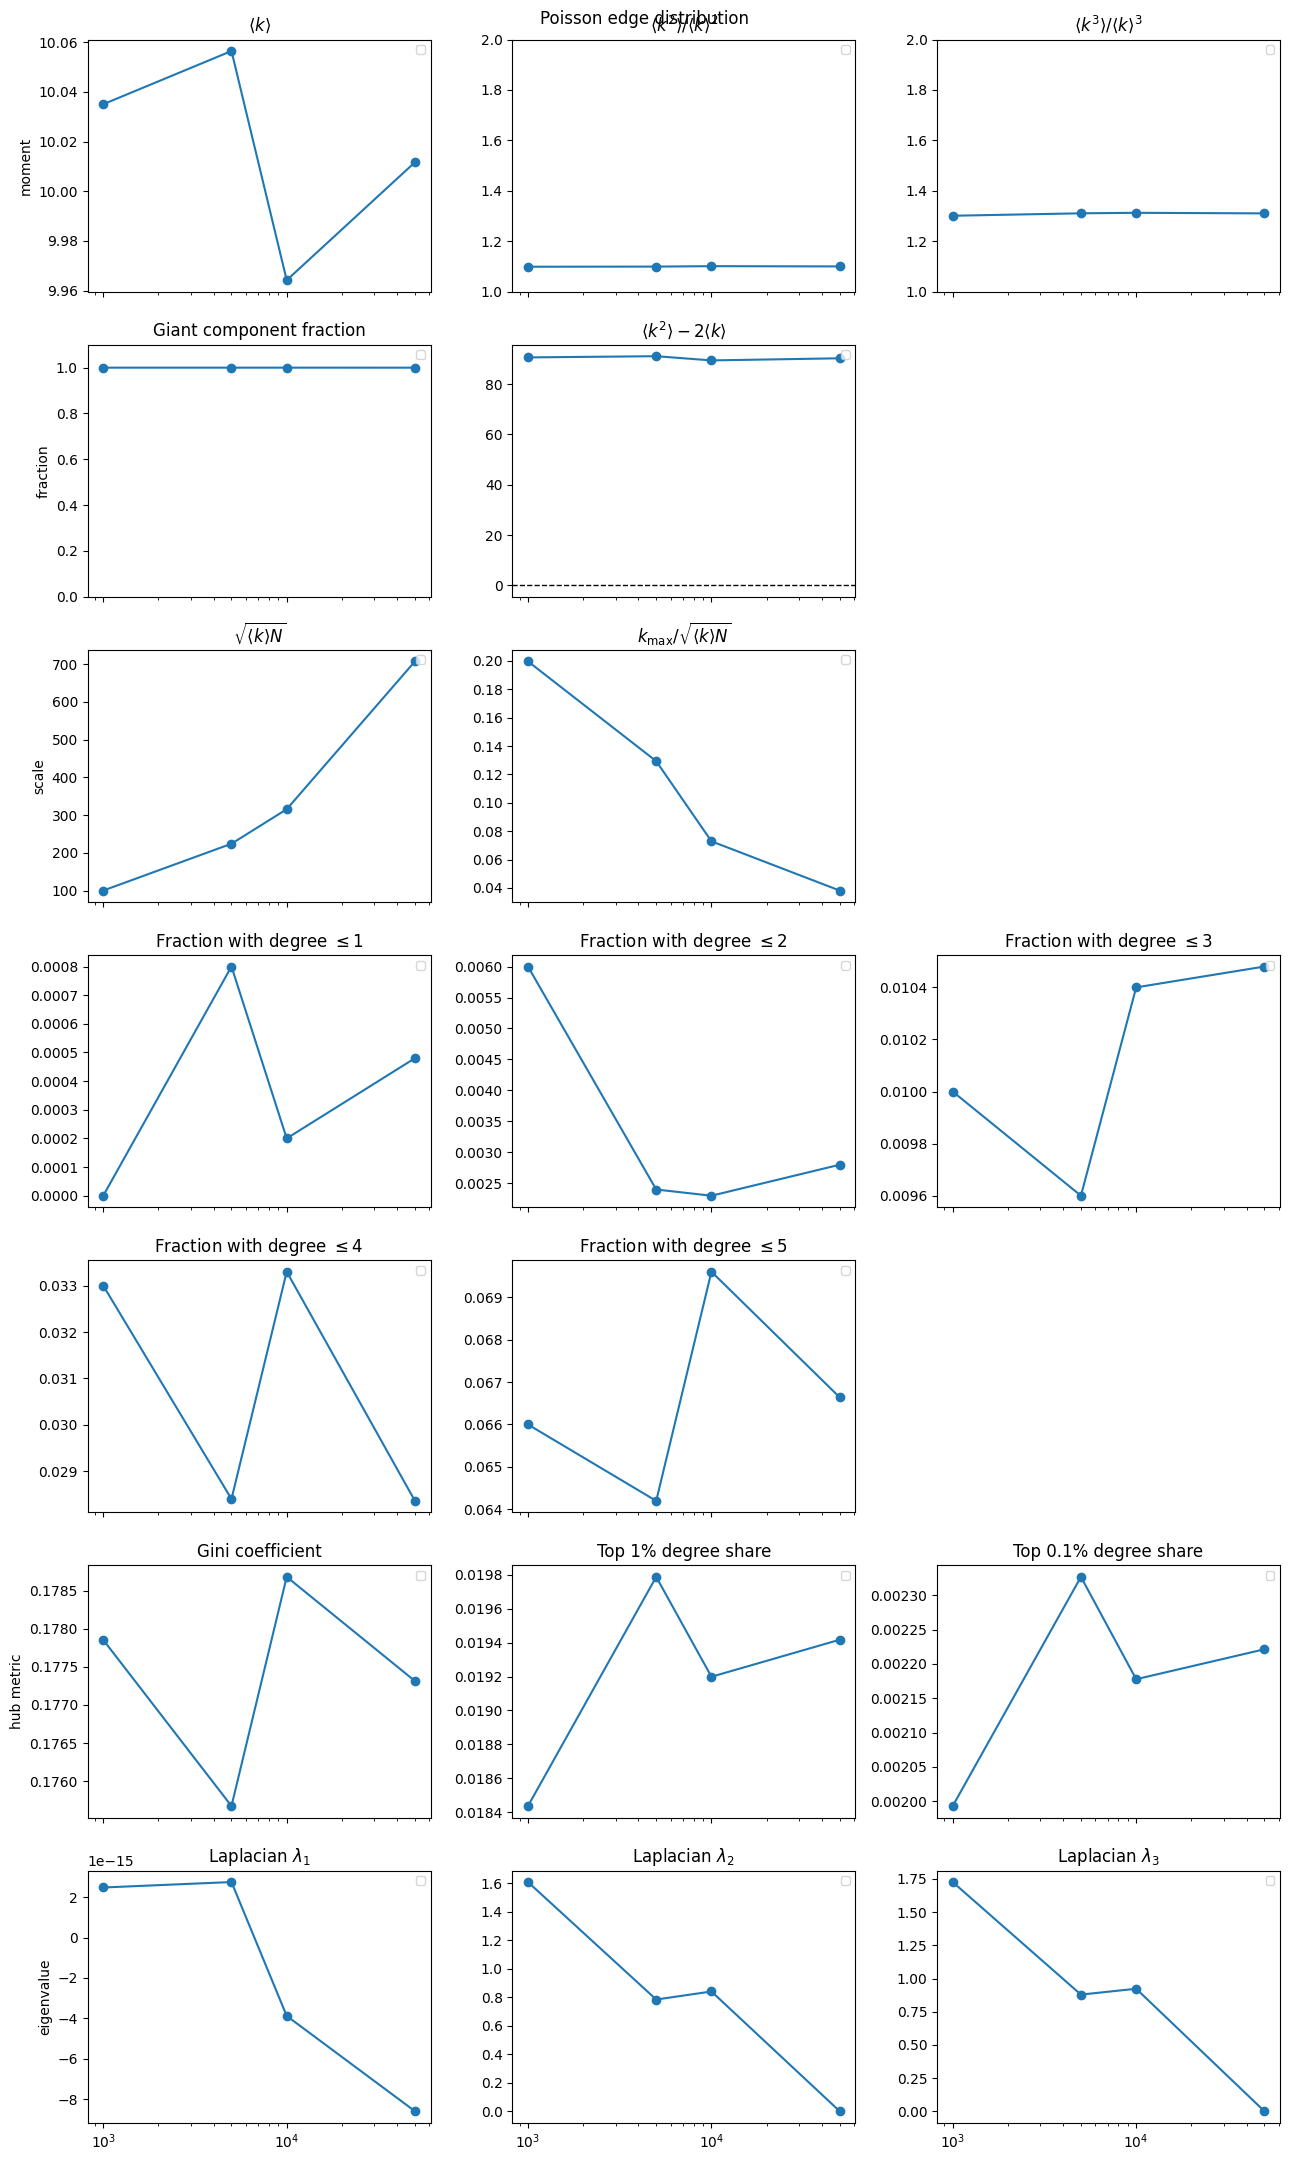

In [4]:
### Poisson Distribution (parameters and thermodynamic limit)

# Configuration model with truncated power-law (scale_free_cutoff) degree distribution
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from scipy import sparse
from scipy.sparse.linalg import eigsh
from dyn_net.networks import get_network

N_list = [ 1000,5000, 10_000, 50_000]


def gini_coefficient(values: np.ndarray) -> float:
    values = np.asarray(values, dtype=float).ravel()
    if values.size == 0:
        return np.nan
    if np.all(values == 0):
        return 0.0
    values = np.sort(values)
    n = values.size
    cum_idx = np.arange(1, n + 1)
    return (2.0 * np.sum(cum_idx * values) / (n * values.sum())) - (n + 1) / n


def top_percentile_degree_share(values: np.ndarray, p: float) -> float:
    values = np.asarray(values, dtype=float).ravel()
    if values.size == 0:
        return np.nan
    total = values.sum()
    if total == 0:
        return 0.0
    k = max(1, int(np.ceil(p * values.size)))
    top = np.sort(values)[-k:]
    return float(top.sum() / total)


records = []
for N in N_list:

    degree_distribution = {
        'name' : 'poisson',
        'params' : {
            "lambda": 10
        }
    }
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
    }
    build, params = get_network('configuration_model', network_params)
    A = build(params)
    if sparse.issparse(A):
        A = A.tocsr()
    else:
        A = sparse.csr_matrix(A)

    degrees = np.asarray(A.sum(axis=1)).ravel()
    m1 = degrees.mean()
    m2 = (degrees ** 2).mean()
    m3 = (degrees ** 3).mean()
    structural_cutoff = np.sqrt(m1 * N)

    frac_le_1 = np.mean(degrees <= 1)
    frac_le_2 = np.mean(degrees <= 2)
    frac_le_3 = np.mean(degrees <= 3)
    frac_le_4 = np.mean(degrees <= 4)
    frac_le_5 = np.mean(degrees <= 5)
    k_max_emp = float(degrees.max()) if degrees.size else 0.0
    k_max_ratio = k_max_emp / structural_cutoff if structural_cutoff > 0 else np.nan

    gini = gini_coefficient(degrees)
    top_1pct = top_percentile_degree_share(degrees, 0.01)
    top_01pct = top_percentile_degree_share(degrees, 0.001)

    G = nx.from_scipy_sparse_array(A)
    if G.number_of_nodes() > 0:
        giant_size = max((len(c) for c in nx.connected_components(G)), default=0)
        frac_giant = giant_size / G.number_of_nodes()
    else:
        frac_giant = 0.0

    # Laplacian eigenvalues (smallest three)
    try:
        L = sparse.diags(degrees) - A
        eigs = eigsh(L, k=3, which='SM', return_eigenvectors=False)
        eigs = np.sort(np.real(eigs))
        eig1, eig2, eig3 = eigs
    except Exception:
        eig1 = eig2 = eig3 = np.nan

    records.append((
        N, m1, m2, m3, structural_cutoff,
        frac_le_1, frac_le_2, frac_le_3, frac_le_4, frac_le_5,
        k_max_emp, k_max_ratio,
        frac_giant,
        gini, top_1pct, top_01pct,
        eig1, eig2, eig3
    ))


# Plot moments and structural diagnostics vs N
fig, axes = plt.subplots(7, 3, figsize=(13, 22), sharex=True)
data = records
Ns = np.array([r[0] for r in data])
m1s = np.array([r[1] for r in data])
m2s = np.array([r[2] for r in data])
m3s = np.array([r[3] for r in data])
k_structs = np.array([r[4] for r in data])
frac1 = np.array([r[5] for r in data])
frac2 = np.array([r[6] for r in data])
frac3 = np.array([r[7] for r in data])
frac4 = np.array([r[8] for r in data])
frac5 = np.array([r[9] for r in data])
kmax_ratio = np.array([r[11] for r in data])
frac_giant = np.array([r[12] for r in data])
gini = np.array([r[13] for r in data])
top_1pct = np.array([r[14] for r in data])
top_01pct = np.array([r[15] for r in data])
eig1s = np.array([r[16] for r in data])
eig2s = np.array([r[17] for r in data])
eig3s = np.array([r[18] for r in data])
crit_vals = m2s - 2 * m1s

axes[0, 0].semilogx(Ns, m1s, marker='o')

axes[0, 1].semilogx(Ns, m2s / m1s**2, marker='o')
axes[0, 1].set_ylim(1,2)
axes[0, 2].semilogx(Ns, m3s / m1s**3, marker='o')
axes[0, 2].set_ylim(1,2)

axes[1, 0].semilogx(Ns, frac_giant, marker='o')
axes[1, 0].set_ylim(0,1.1)
axes[1, 1].semilogx(Ns, crit_vals, marker='o')

axes[2, 0].semilogx(Ns, k_structs, marker='o')
axes[2, 1].semilogx(Ns, kmax_ratio, marker='o')

axes[3, 0].semilogx(Ns, frac1, marker='o')
axes[3, 1].semilogx(Ns, frac2, marker='o')
axes[3, 2].semilogx(Ns, frac3, marker='o')

axes[4, 0].semilogx(Ns, frac4, marker='o')
axes[4, 1].semilogx(Ns, frac5, marker='o')

axes[5, 0].semilogx(Ns, gini, marker='o')
axes[5, 1].semilogx(Ns, top_1pct, marker='o')
axes[5, 2].semilogx(Ns, top_01pct, marker='o')

axes[6, 0].semilogx(Ns, eig1s, marker='o')
axes[6, 1].semilogx(Ns, eig2s, marker='o')
axes[6, 2].semilogx(Ns, eig3s, marker='o')

axes[0, 0].set_title(r'$\langle k \rangle$')
axes[0, 0].set_ylabel('moment')
axes[0, 1].set_title(r'$\langle k^2 \rangle / \langle k \rangle^2$')
axes[0, 2].set_title(r'$\langle k^3 \rangle / \langle k \rangle^3$')

axes[1, 0].set_title('Giant component fraction')
axes[1, 0].set_ylabel('fraction')
axes[1, 1].set_title(r'$\langle k^2 \rangle - 2\langle k \rangle$')
axes[1, 1].axhline(0.0, color='k', linewidth=1.0, linestyle='--')

axes[2, 0].set_title(r'$\sqrt{\langle k \rangle N }$')
axes[2, 0].set_ylabel('scale')
axes[2, 1].set_title(r'$k_{\max} / \sqrt{\langle k \rangle N}$')

axes[3, 0].set_title(r'Fraction with degree $\leq 1$')
axes[3, 1].set_title(r'Fraction with degree $\leq 2$')
axes[3, 2].set_title(r'Fraction with degree $\leq 3$')

axes[4, 0].set_title(r'Fraction with degree $\leq 4$')
axes[4, 1].set_title(r'Fraction with degree $\leq 5$')

axes[5, 0].set_title('Gini coefficient')
axes[5, 0].set_ylabel('hub metric')
axes[5, 1].set_title('Top 1% degree share')
axes[5, 2].set_title('Top 0.1% degree share')

axes[6, 0].set_title('Laplacian $\lambda_1$')
axes[6, 0].set_ylabel('eigenvalue')
axes[6, 1].set_title('Laplacian $\lambda_2$')
axes[6, 2].set_title('Laplacian $\lambda_3$')

for ax in axes.ravel():
    if ax in (axes[1, 2], axes[2, 2], axes[4, 2]):
        continue
    ax.legend(fontsize=8)

axes[1, 2].axis('off')
axes[2, 2].axis('off')
axes[4, 2].axis('off')

fig.suptitle('Poisson edge distribution')
fig.tight_layout()
#fig.savefig("../../figures/Poisson_edge_distribution.png",dpi=600)


### Truncated Power Law

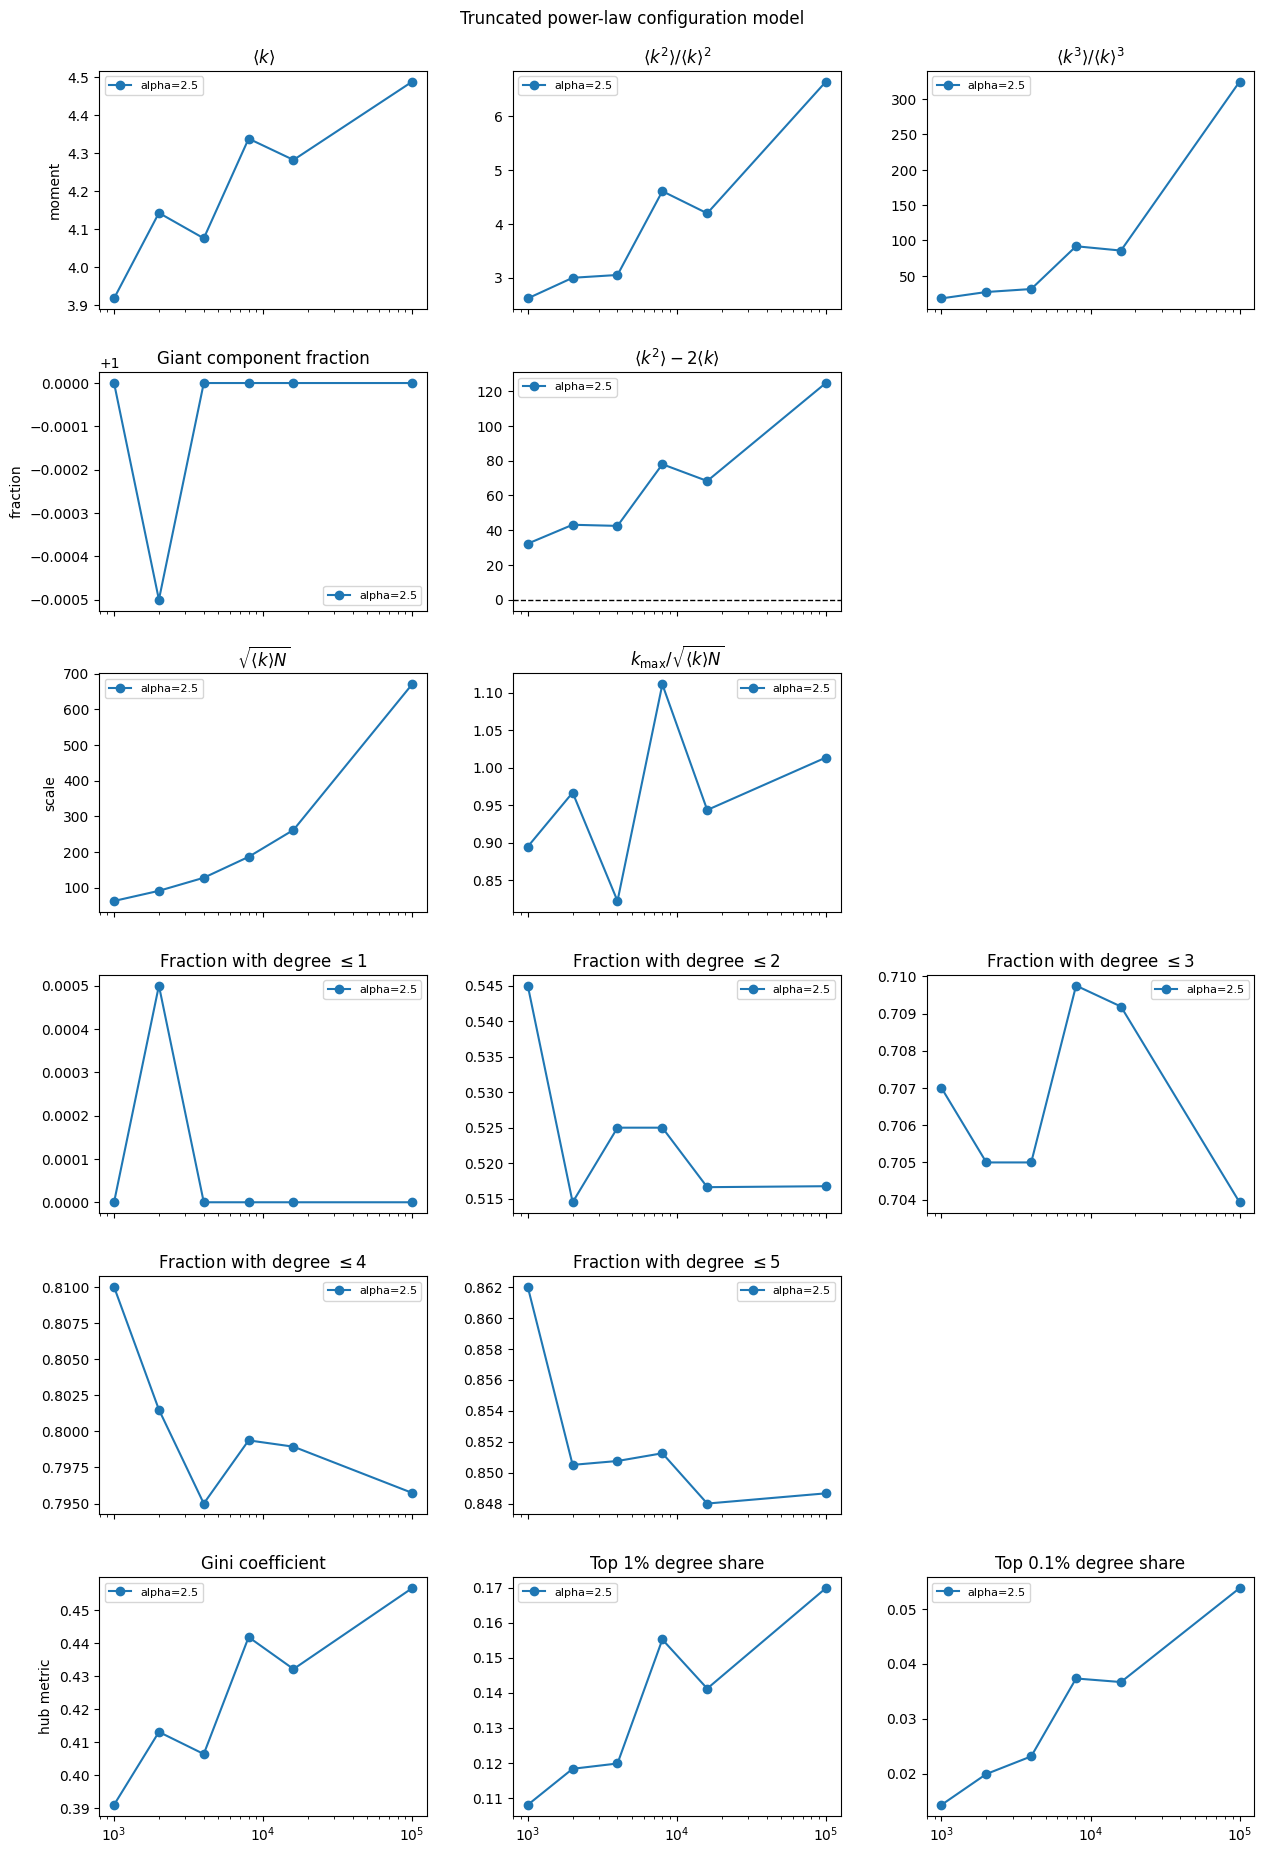

In [ ]:
# Configuration model with truncated power-law (scale_free_cutoff) degree distribution
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from dyn_net.networks import get_network

N_list = [ 1000, 2000, 4000, 8000, 16000, 100_000]
alphas = [2.5]#, 3.5, 4.5]
k_mins = [2]#,3,3]



def gini_coefficient(values: np.ndarray) -> float:
    values = np.asarray(values, dtype=float).ravel()
    if values.size == 0:
        return np.nan
    if np.all(values == 0):
        return 0.0
    values = np.sort(values)
    n = values.size
    cum_idx = np.arange(1, n + 1)
    return (2.0 * np.sum(cum_idx * values) / (n * values.sum())) - (n + 1) / n


def top_percentile_degree_share(values: np.ndarray, p: float) -> float:
    values = np.asarray(values, dtype=float).ravel()
    if values.size == 0:
        return np.nan
    total = values.sum()
    if total == 0:
        return 0.0
    k = max(1, int(np.ceil(p * values.size)))
    top = np.sort(values)[-k:]
    return float(top.sum() / total)


results = {}
for alpha,k_min in zip(alphas,k_mins):
    records = []
    for N in N_list:

        degree_distribution = {
            'name' : 'scale_free_cutoff',
            'params' : {
                'alpha' : alpha,
                'k_min' : k_min,
                'k_max' : int( np.floor( np.sqrt( (alpha-1) / (alpha-2) * k_min  * N ) ) )
            }
        }
        network_params = {
            'n' : N,
            'degree_distribution': degree_distribution
        }
        build, params = get_network('configuration_model', network_params)
        A = build(params)
        degrees = np.asarray(A.sum(axis=1)).ravel()
        m1 = degrees.mean()
        m2 = (degrees ** 2).mean()
        m3 = (degrees ** 3).mean()
        structural_cutoff = np.sqrt(m1 * N)

        # Additional structural diagnostics
        if (degrees == 0).any():
            print("Some degrees are zero!")
            break 
        frac_le_1 = np.mean(degrees <= 1)
        frac_le_2 = np.mean(degrees <= 2)
        frac_le_3 = np.mean(degrees <= 3)
        frac_le_4 = np.mean(degrees <= 4)
        frac_le_5 = np.mean(degrees <= 5)
        k_max_emp = float(degrees.max()) if degrees.size else 0.0
        k_max_ratio = k_max_emp / structural_cutoff if structural_cutoff > 0 else np.nan

        gini = gini_coefficient(degrees)
        top_1pct = top_percentile_degree_share(degrees, 0.01)
        top_01pct = top_percentile_degree_share(degrees, 0.001)

        G = nx.from_scipy_sparse_array(A)
        if G.number_of_nodes() > 0:
            giant_size = max((len(c) for c in nx.connected_components(G)), default=0)
            frac_giant = giant_size / G.number_of_nodes()
        else:
            frac_giant = 0.0

        records.append((
            N, m1, m2, m3, structural_cutoff,
            frac_le_1, frac_le_2, frac_le_3, frac_le_4, frac_le_5,
            k_max_emp, k_max_ratio,
            frac_giant,
            gini, top_1pct, top_01pct
        ))
    results[alpha] = records


# Plot moments and structural diagnostics vs N
fig, axes = plt.subplots(6, 3, figsize=(13, 19), sharex=True)
for alpha in alphas:
    data = results[alpha]
    Ns = np.array([r[0] for r in data])
    m1s = np.array([r[1] for r in data])
    m2s = np.array([r[2] for r in data])
    m3s = np.array([r[3] for r in data])
    k_structs = np.array([r[4] for r in data])
    frac1 = np.array([r[5] for r in data])
    frac2 = np.array([r[6] for r in data])
    frac3 = np.array([r[7] for r in data])
    frac4 = np.array([r[8] for r in data])
    frac5 = np.array([r[9] for r in data])
    kmax_ratio = np.array([r[11] for r in data])
    frac_giant = np.array([r[12] for r in data])
    gini = np.array([r[13] for r in data])
    top_1pct = np.array([r[14] for r in data])
    top_01pct = np.array([r[15] for r in data])
    crit_vals = m2s - 2 * m1s

    axes[0, 0].semilogx(Ns, m1s, marker='o', label=f'alpha={alpha}')
    axes[0, 1].semilogx(Ns, m2s / m1s**2, marker='o', label=f'alpha={alpha}')
    axes[0, 2].semilogx(Ns, m3s / m1s**3, marker='o', label=f'alpha={alpha}')

    axes[1, 0].semilogx(Ns, frac_giant, marker='o', label=f'alpha={alpha}')
    axes[1, 1].semilogx(Ns, crit_vals, marker='o', label=f'alpha={alpha}')

    axes[2, 0].semilogx(Ns, k_structs, marker='o', label=f'alpha={alpha}')
    axes[2, 1].semilogx(Ns, kmax_ratio, marker='o', label=f'alpha={alpha}')

    axes[3, 0].semilogx(Ns, frac1, marker='o', label=f'alpha={alpha}')
    axes[3, 1].semilogx(Ns, frac2, marker='o', label=f'alpha={alpha}')
    axes[3, 2].semilogx(Ns, frac3, marker='o', label=f'alpha={alpha}')

    axes[4, 0].semilogx(Ns, frac4, marker='o', label=f'alpha={alpha}')
    axes[4, 1].semilogx(Ns, frac5, marker='o', label=f'alpha={alpha}')

    axes[5, 0].semilogx(Ns, gini, marker='o', label=f'alpha={alpha}')
    axes[5, 1].semilogx(Ns, top_1pct, marker='o', label=f'alpha={alpha}')
    axes[5, 2].semilogx(Ns, top_01pct, marker='o', label=f'alpha={alpha}')

axes[0, 0].set_title(r'$\langle k \rangle$')
axes[0, 0].set_ylabel('moment')
axes[0, 1].set_title(r'$\langle k^2 \rangle / \langle k \rangle^2$')
axes[0, 2].set_title(r'$\langle k^3 \rangle / \langle k \rangle^3$')

axes[1, 0].set_title('Giant component fraction')
axes[1, 0].set_ylabel('fraction')
axes[1, 1].set_title(r'$\langle k^2 \rangle - 2\langle k \rangle$')
axes[1, 1].axhline(0.0, color='k', linewidth=1.0, linestyle='--')

axes[2, 0].set_title(r'$\sqrt{\langle k \rangle N }$')
axes[2, 0].set_ylabel('scale')
axes[2, 1].set_title(r'$k_{\max} / \sqrt{\langle k \rangle N}$')

axes[3, 0].set_title(r'Fraction with degree $\leq 1$')
axes[3, 1].set_title(r'Fraction with degree $\leq 2$')
axes[3, 2].set_title(r'Fraction with degree $\leq 3$')

axes[4, 0].set_title(r'Fraction with degree $\leq 4$')
axes[4, 1].set_title(r'Fraction with degree $\leq 5$')

axes[5, 0].set_title('Gini coefficient')
axes[5, 0].set_ylabel('hub metric')
axes[5, 1].set_title('Top 1% degree share')
axes[5, 2].set_title('Top 0.1% degree share')

for ax in axes.ravel():
    if ax in (axes[1, 2], axes[2, 2], axes[4, 2]):
        continue
    ax.legend(fontsize=8)

axes[1, 2].axis('off')
axes[2, 2].axis('off')
axes[4, 2].axis('off')

fig.suptitle('Truncated power-law configuration model')
fig.tight_layout(pad=2)
fig.savefig("../../figures/PowerLaw_SecondChoice_Alpha25.png",dpi=600)


### Properties of Laplacian network in the thermodynamic limit

- Dense Graph

In [47]:
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
network_name = "configuration_model"
c = 0.05
Ns = [1000, 5000,10_000]
n_eigenvalues = 50

records = []
for N in Ns:
    degree_distribution = {
        'name' : "poisson",
        'params' : {
            'lambda' : c*N
        }
    } 
    network_params = {
        'n' : N,
        'degree_distribution': degree_distribution
        }

    build, params = get_network(network_name,network_params)
    A = build(params)
    degrees = A.sum(axis=1)
    G = nx.from_scipy_sparse_array(A)
    if G.number_of_nodes() > 0:
        giant_size = max((len(c) for c in nx.connected_components(G)), default=0)
        frac_giant = giant_size / G.number_of_nodes()
    else:
        frac_giant = 0.0
    avg_degree = degrees.mean() 
    structural_cutoff = np.sqrt(avg_degree * N)
    L = diags(degrees) - A
    L = L / avg_degree
    eigs , eigenvecs = eigsh(L,k=n_eigenvalues,which="BE")
    records.append(
        {"eigs" : eigs,
         "struct_cutoff_check" : degrees.max() / structural_cutoff,
         "giant_component" : frac_giant,
         "N" : N
        }
         )

In [49]:
dict

{'eigs': array([8.95610347e-17, 8.12301391e-01, 8.25356191e-01, 8.28928102e-01,
        8.34327393e-01, 8.41592301e-01, 8.42577168e-01, 8.45208673e-01,
        8.45701518e-01, 8.48328667e-01, 8.49180556e-01, 8.50634520e-01,
        8.51736686e-01, 8.52976961e-01, 8.54109325e-01, 8.57357625e-01,
        8.57629316e-01, 8.58110759e-01, 8.58209114e-01, 8.58506133e-01,
        8.58976793e-01, 8.59581673e-01, 8.60144078e-01, 8.60996127e-01,
        8.61252304e-01, 1.14942033e+00, 1.14975780e+00, 1.15010124e+00,
        1.15118190e+00, 1.15139353e+00, 1.15219711e+00, 1.15409510e+00,
        1.15442540e+00, 1.15580498e+00, 1.15658128e+00, 1.15741794e+00,
        1.15771892e+00, 1.15836842e+00, 1.15919953e+00, 1.15991444e+00,
        1.15996358e+00, 1.16056639e+00, 1.16101676e+00, 1.16299803e+00,
        1.16333367e+00, 1.16350928e+00, 1.16963218e+00, 1.17174504e+00,
        1.17850601e+00, 1.18453923e+00]),
 'struct_cutoff_check': 0.2612258262540049,
 'giant_component': 1.0,
 'N': 10000}

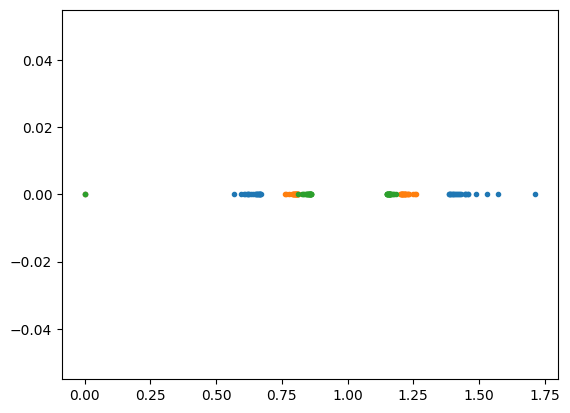

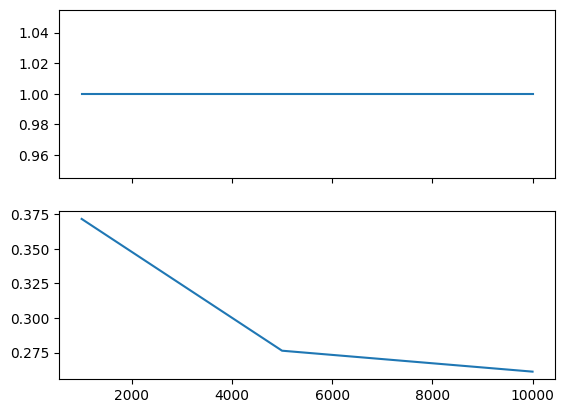

In [52]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots()
for dict in records:
    eigs = dict["eigs"]
    N = dict["N"]
    ax.plot(np.real(eigs),np.imag(eigs),'.',label=N)

fig,ax = plt.subplots(nrows=2,sharex=True)

Ns = [x["N"] for x in records]
giant_component = [x["giant_component"] for x in records]
structural_cutoff = [x["struct_cutoff_check"] for x in records]
ax[0].plot(Ns,giant_component,label="giant component fraction")
ax[1].plot(Ns,structural_cutoff,label="structural cutoff")

## Bistable graphon

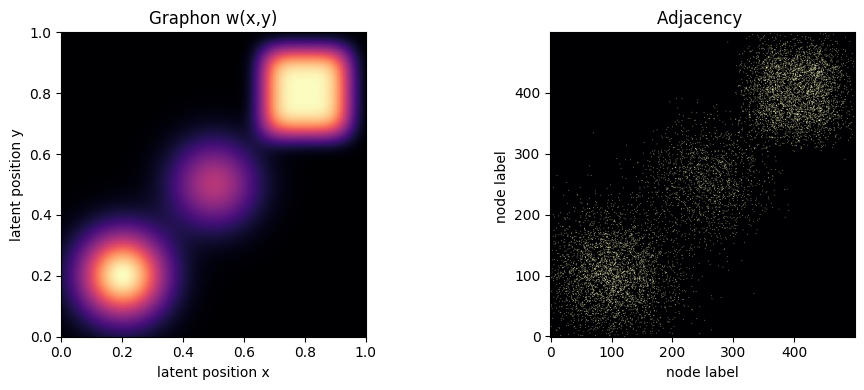

In [ ]:
# Compare bistable graphon and sampled adjacency (sorted latent)
import numpy as np
from matplotlib import pyplot as plt
from dyn_net.networks.bistable_graphon import BistableGraphonParams, build, _w

p = BistableGraphonParams(n=500, sort_latent=True, seed=1)
A = build(p)

grid = np.linspace(0, 1, 200, endpoint=False)
xx, yy = np.meshgrid(grid, grid, indexing="ij")
W = _w(xx, yy, p)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
extent = (0, 1, 0, 1)

axes[0].imshow(W, origin="lower", cmap="magma", extent=extent)
axes[0].set_title("Graphon w(x,y)")
axes[0].set_xlabel("latent position x")
axes[0].set_ylabel("latent position y")

axes[1].imshow(A.toarray(), origin="lower", cmap="magma")
axes[1].set_title("Adjacency ")
axes[1].set_xlabel("node label")
axes[1].set_ylabel("node label ")

plt.tight_layout()
